In [1]:
using PyPlot
using Elliptic
using PyCall
np = pyimport("numpy");

In [2]:
#input parameter
nω = 2^9
ωmin = -3.0
ωmax = 3.0
t = 0.5;

In [3]:
#mesh
ω = range(ωmin,length=nω,stop=ωmax)
ω = convert(Array{Float64,1},ω);

In [4]:
#dos in 1D
function dos1D(t::Float64,ω::Float64)
    sqr = 4*t^2 - ω^2
    if sqr > 0.
        return 1 / sqrt(sqr) / π
    else
        return 0.0
    end
end;

In [5]:
#dos in 2D
function dos2D(t::Float64,ω::Float64)
    m_a = 1. - (ω / (2. * t))^2 / 4.
    if m_a < 0. || m_a > 1.f0
        return 0.0
    else
        return Elliptic.K.(m_a) / (2. * t * π^2) 
    end
end;

In [6]:
#dos in 3D
function dos3D(t::Float64,ω::Float64)
    z = range(-0.999,length=250,stop=0.999)
    z = convert(Array{Float64,1},z);
    ma = 1. .- ((ω / (2. * t) .+ z) ./ 2.).^2.
    km = zeros(Float64,length(ma))
    for (imax,nma) in enumerate(ma)
        if nma > 0. && nma < 1.
            km[imax] = Elliptic.K.(nma)
        end
    end
    intx = km ./ sqrt.(1. .- z.^2)
    return np.trapz(intx,z) / (π^3. * 2. * t)
end

dos3D (generic function with 1 method)

In [12]:
@time A1D = dos1D.(t,ω);

  0.000024 seconds (7 allocations: 4.328 KiB)


In [13]:
@time A2D = dos2D.(t,ω);

  0.000173 seconds (610 allocations: 15.906 KiB)


In [14]:
@time A3D = dos3D.(t,ω);

  0.039058 seconds (13.84 k allocations: 4.747 MiB)


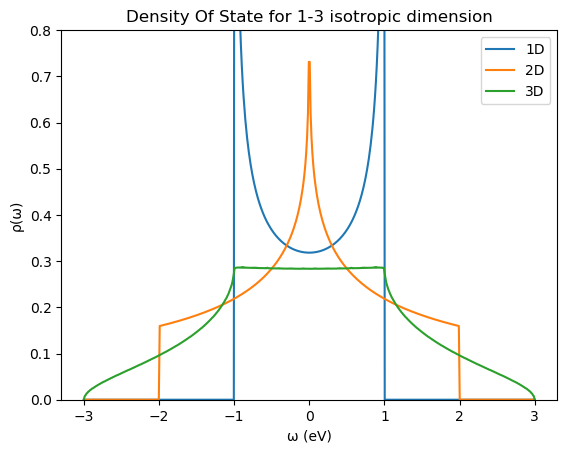

In [10]:
plt.plot(ω,A1D,label="1D")
plt.plot(ω,A2D,label="2D")
plt.plot(ω,A3D,label="3D")
plt.ylim(0,0.8)
plt.ylabel("ρ(ω)")
plt.xlabel("ω (eV)")
plt.title("Density Of State for 1-3 isotropic dimension")
plt.legend()
plt.show()

In [11]:
println("Check Normalization (must be ≈ 1)")
println("")
@show np.trapz(A1D,ω)
@show np.trapz(A2D,ω)
@show np.trapz(A3D,ω);

Check Normalization (must be ≈ 1)

np.trapz(A1D, ω) = 0.9536122522026869
np.trapz(A2D, ω) = 0.9979293932750154
np.trapz(A3D, ω) = 0.99183012915366
